# Global Streamflow Prediction API Demo
This example will show how to get the historical simulation and forecast for the Rio Coco in Nicaragua/Honduras using the API.

### Imports and constants

In [28]:
import pandas as pd
import requests
from io import StringIO
import json
from lxml import etree, html
import matplotlib.pyplot as plt
from datetime import datetime

%autosave 0

# Checkout the documentation for a list of available calls and parameters
api_base_url = 'http://aci-gsp.eastus.azurecontainer.io'

Autosave disabled


### Functions

In [46]:
def call_api(call, params={}):
    api_request = requests.get(f'{api_base_url}/api/{call}/', params=params)
    return api_request

def format_csv_results(results):
    data = StringIO(results.text)  # Create an IO object for parsing

    df = pd.read_csv(data, index_col=0)  # Create DataFrame
    df.index = pd.to_datetime(df.index)  # Parse dates to datetime type
    data.close()

    return df

def plot_results(df):
    ax = df.plot(figsize=(12, 4), legend=False)
    ax.set_ylabel("Discharge (cms)")
    plt.show()

### Find available Regions

In [30]:
regions = call_api('AvailableRegions')
target_region = json.loads(regions.text)['available_regions'][-1]
json.loads(regions.text)

{'available_regions': ['africa-continental',
  'asia-middle_east',
  'asia-north_asia',
  'central_america-merit',
  'dominican_republic-hand',
  'europe-global',
  'north_america-continental',
  'south_america-continental',
  'south_asia-mainland']}

### Find available Dates

In [31]:
regions = call_api('AvailableDates', params={'region': target_region})
target_date = json.loads(regions.text)['available_dates'][0]
print(target_date)
json.loads(regions.text)

20190612.00


{'available_dates': ['20190612.00', 'south_asia-mainland-return_periods.csv']}

### Get forecast ensembles
There are 51 different ensemble forecasts plus a 52nd higher resolution forecast. Each ensemble presents a possible scenario by using slightly different inputs to account for uncertainty.

In [35]:
params = {
    'region': target_region, 
    'date': target_date, # retrieves latest available date if left out, equal "most_recent", or ""
    'ensemble': 52, # a unique ensemble number, individual ensembles separated by commas or a range separated by a "-". Retrieves all ensembles left out, equal "all", or ""
    'lat': 17.14, 
    'lon': 81.67, 
    'return_format': 'json' # csv and waterml formats also available
}

ens_results = call_api('ForecastEnsembles', params)
target_id = json.loads(ens_results.text)['comid']
json.loads(ens_results.text)

{'comid': 69494,
 'enddate': '2019-06-22T00:00:00Z',
 'ensembles': {'52': 'Ensemble 52'},
 'gendate': '2019-06-13T16:47:24.164883Z',
 'region': 'south_asia-mainland',
 'startdate': '2019-06-12T00:00:00Z',
 'time_series': {'52': [{'date': '2019-06-12T00:00:00Z',
    'val': 99.60829162597656},
   {'date': '2019-06-12T01:00:00Z', 'val': 99.54969024658203},
   {'date': '2019-06-12T02:00:00Z', 'val': 99.42183685302734},
   {'date': '2019-06-12T03:00:00Z', 'val': 99.29509735107422},
   {'date': '2019-06-12T04:00:00Z', 'val': 99.16246795654297},
   {'date': '2019-06-12T05:00:00Z', 'val': 99.01595306396484},
   {'date': '2019-06-12T06:00:00Z', 'val': 98.88056945800781},
   {'date': '2019-06-12T07:00:00Z', 'val': 98.68844604492188},
   {'date': '2019-06-12T08:00:00Z', 'val': 98.53855895996094},
   {'date': '2019-06-12T09:00:00Z', 'val': 98.3819580078125},
   {'date': '2019-06-12T10:00:00Z', 'val': 98.2376708984375},
   {'date': '2019-06-12T11:00:00Z', 'val': 98.11192321777344},
   {'date': '201

In [44]:
params = {
    'region': target_region, 
    'reach_id': target_id,  
    'return_format': 'csv'
}

all_ens_results = call_api('ForecastEnsembles', params)
all_ens_df = format_csv_results(all_ens_results)

ensemble_values = all_ens_df.iloc[:, :-1].dropna() # get all ensembles except high resolution (# 52)
ensemble_values.head()

,ensemble_01 (m3/s),ensemble_02 (m3/s),ensemble_03 (m3/s),ensemble_04 (m3/s),ensemble_05 (m3/s),ensemble_06 (m3/s),ensemble_07 (m3/s),ensemble_08 (m3/s),ensemble_09 (m3/s),ensemble_10 (m3/s),...,ensemble_42 (m3/s),ensemble_43 (m3/s),ensemble_44 (m3/s),ensemble_45 (m3/s),ensemble_46 (m3/s),ensemble_47 (m3/s),ensemble_48 (m3/s),ensemble_49 (m3/s),ensemble_50 (m3/s),ensemble_51 (m3/s)
datetime,,,,,,,,,,,,,,,,,,,,,
2019-06-12 00:00:00,99.608292,99.608292,99.608292,99.608292,99.608292,99.608292,99.608292,99.608292,99.608292,99.608292,...,99.608292,99.608292,99.608292,99.608292,99.608292,99.608292,99.608292,99.608292,99.608292,99.608292
2019-06-12 03:00:00,99.422211,99.422211,99.422211,99.422211,99.422211,99.422211,99.422211,99.422211,99.422211,99.422211,...,99.389725,99.391190,99.388763,99.389946,99.388763,99.388763,99.391190,99.388741,99.388756,99.422211
2019-06-12 06:00:00,99.018066,99.018066,99.018066,99.018066,99.018066,99.018066,99.018066,99.018066,99.018066,99.018066,...,98.945419,98.947670,98.945793,98.945305,98.945190,98.945206,98.947922,98.945457,98.945641,99.002403
2019-06-12 09:00:00,98.570786,98.570786,98.570786,98.570786,98.570786,98.570786,98.570786,98.570168,98.570786,98.570786,...,98.622856,98.618462,98.627464,98.621666,98.627556,98.627266,98.620178,98.627487,98.627007,98.548767
2019-06-12 12:00:00,98.098824,98.095322,98.098824,98.098839,98.098824,98.098824,98.095291,98.094467,98.095375,98.098824,...,98.380386,98.368080,98.381630,98.380318,98.384758,98.385185,98.368736,98.384682,98.374451,98.125748


### Get Forecast Statistics
Calculate basic statistics from ensembles (i.e. mean, min, max, and standard deviation)

In [39]:
params = {
    'region': target_region, 
    'reach_id': target_id, # reponds faster if reach_id given instead of lat lon
    'stat_type': 'mean', # min, max, and other stat types also available
    'return_format': 'waterml'
}

mean = call_api('ForecastStats', params)
print(mean.text)

<?xml version="1.0" encoding="utf-8" ?>
<wml2:Collection xmlns:wml2="http://www.opengis.net/waterml/2.0" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:gml="http://www.opengis.net/gml/3.2" xmlns:om="http://www.opengis.net/om/2.0" xmlns:sa="http://www.opengis.net/sampling/2.0" xmlns:swe="http://www.opengis.net/swe/2.0" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:sf="http://www.opengis.net/sampling/2.0" xmlns:sams="http://www.opengis.net/samplingSpatial/2.0" xmlns:gco="http://www.isotc211.org/2005/gco" xmlns:gmd="http://www.isotc211.org/2005/gmd" xsi:schemaLocation="http://www.opengis.net/waterml/2.0 http://schemas.opengis.net/waterml/2.0/waterml2.xsd" gml:id="GSP_south_asia-mainland_forecaststats__2019-06-12T00:00:00Z">
<gml:description>
    A timeseries collection with the requested forecast statistics extracted from all the ensemble members of the ECMWF runoff forecast previously downscaled with RAPID.
</gml:description>
<wml2:metadata>
    <wml2:DocumentMetadata gml

### Get Historic Data

In [41]:
params = {
    'region': target_region, 
    'reach_id': target_id, 
    'return_format': 'csv'
}

historic_sim = call_api('HistoricSimulation', params)

parsed_results = format_csv_results(historic_sim)
parsed_results.head()

,streamflow (m3/s)
datetime,
1980-01-01,0.605310
1980-01-02,3.297659
1980-01-03,12.300687
1980-01-04,33.258732
1980-01-05,57.765438


### Visualize the data

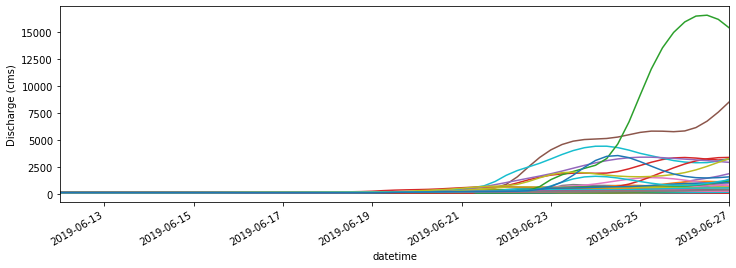

In [47]:
plot_results(ensemble_values)

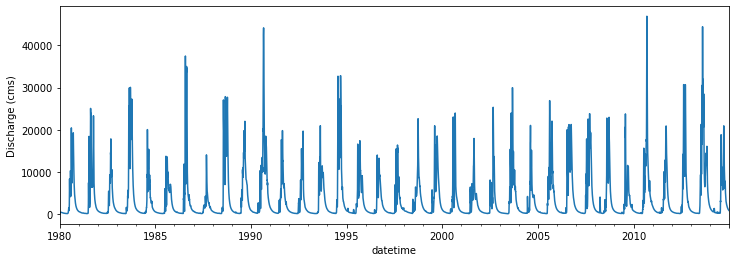

In [48]:
plot_results(parsed_results)